In [1]:
#Description use MACD to find Buy and Sell Price
#Import libraries
from datetime import datetime
import MetaTrader5 as mt5 
import pandas as pd
pd.set_option('display.max_columns', 500) # number of columns to be displayed
pd.set_option('display.width', 30000)      # max table width to display
import numpy as np
import pytz 
import talib as ta
from talib import MA_Type
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data
# establish connection to MetaTrader 5 terminal 
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error()) 
    quit()

# set time zone to UTC
timezone = pytz.timezone("Etc/UTC")
utc_from = datetime(2020, 10,1, hour = 23, minute = 59,microsecond = 999999,tzinfo=timezone)
utc_to = datetime(2020, 10, 16, hour = 23, minute = 59,microsecond = 999999,tzinfo=timezone)
rates = mt5.copy_rates_range("GOLD", mt5.TIMEFRAME_H4, utc_from, utc_to)

# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()
df = pd.DataFrame(rates)
# convert time in seconds into the 'datetime' format
df['time']=pd.to_datetime(df['time'], unit='s')
#set 'time' to be index
df = df.set_index(pd.DatetimeIndex(df['time'].values))
df

,time,open,high,low,close,tick_volume,spread,real_volume
2020-10-02 00:00:00,2020-10-02 00:00:00,1905.15,1907.29,1899.59,1900.40,3437,29,0
2020-10-02 04:00:00,2020-10-02 04:00:00,1900.45,1901.26,1890.43,1891.15,6187,33,0
2020-10-02 08:00:00,2020-10-02 08:00:00,1891.13,1917.07,1889.77,1905.81,14956,33,0
2020-10-02 12:00:00,2020-10-02 12:00:00,1905.80,1912.00,1905.22,1911.52,12924,33,0
2020-10-02 16:00:00,2020-10-02 16:00:00,1911.59,1911.65,1898.16,1901.39,17873,33,0
...,...,...,...,...,...,...,...,...
2020-10-16 04:00:00,2020-10-16 04:00:00,1907.38,1910.55,1903.86,1905.70,6533,33,0
2020-10-16 08:00:00,2020-10-16 08:00:00,1905.80,1912.28,1902.64,1909.98,10112,33,0
2020-10-16 12:00:00,2020-10-16 12:00:00,1909.94,1913.80,1905.10,1906.86,11440,33,0
2020-10-16 16:00:00,2020-10-16 16:00:00,1906.86,1910.24,1897.81,1902.82,14763,33,0


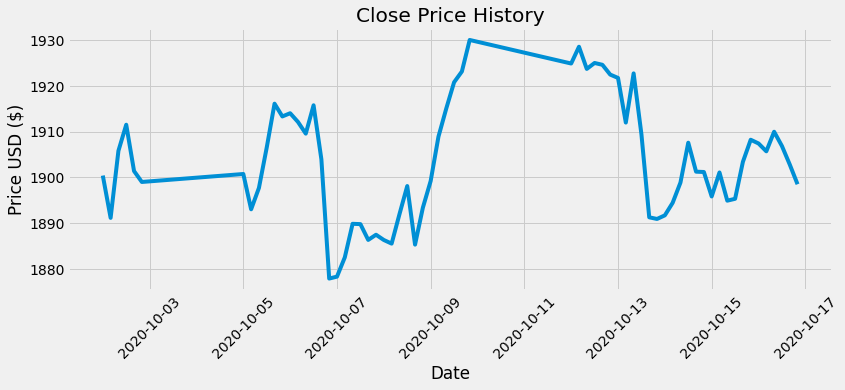

In [3]:
#Show stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['close'],label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [4]:
#
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(
                                df['close'], 
                                fastperiod=8, 
                                slowperiod=17, 
                                signalperiod=9)
Smacd = df.macd * 5 +1900                               
Smacd1 = df.macd * 5
Ssignal = df.macdsignal * 5
df['upper'], df['middle'], df['lower'] = ta.BBANDS(
                                df['close'], 
                                timeperiod=20,
                                # number of non-biased standard deviations from the mean
                                nbdevup=2,
                                nbdevdn=2,
                                # Moving average type: simple moving average here
                                matype=0)
UBB = df.upper
LBB = df.lower
DiffBB = UBB - LBB + 1900
DiffBB1 = UBB - LBB 
df['williams'] = ta.WILLR(
                                df['high'],
                                df['low'],
                                df['close'],
                                timeperiod=10)
Swilliams = df.williams /10 + 1900
Swilliams1 = df.williams/10
df.describe()

,open,high,low,close,tick_volume,spread,real_volume,macd,macdsignal,macdhist,upper,middle,lower,williams
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.0,42.000000,42.000000,42.000000,47.000000,47.000000,47.000000,57.000000
mean,1903.877121,1908.738485,1898.400758,1903.704697,9774.045455,32.560606,0.0,0.739721,0.684960,0.054760,1929.743209,1904.031830,1878.320450,-43.623516
std,12.892421,12.611182,12.967777,12.990767,4165.853066,1.873941,0.0,4.468073,3.345517,2.673518,9.248697,6.644144,7.367697,28.576091
min,1878.400000,1880.750000,1872.810000,1877.880000,2920.000000,23.000000,0.0,-4.992181,-2.785730,-5.558459,1912.261879,1894.811500,1865.363606,-98.874062
25%,1893.692500,1899.925000,1889.657500,1893.637500,6308.750000,33.000000,0.0,-3.034693,-2.031792,-1.525820,1922.819526,1897.877000,1871.167682,-64.608968
50%,1903.675000,1908.870000,1898.055000,1902.105000,9545.500000,33.000000,0.0,-0.437958,-0.905736,0.177750,1926.755019,1902.543500,1878.300454,-41.191529
75%,1912.110000,1916.962500,1907.737500,1912.095000,12339.750000,33.000000,0.0,4.252687,3.747494,1.587378,1940.272254,1910.364500,1885.524585,-18.333982
max,1928.880000,1933.140000,1922.480000,1930.050000,17873.000000,33.000000,0.0,9.027848,6.686218,4.980797,1942.511392,1914.057000,1888.464121,-0.186027


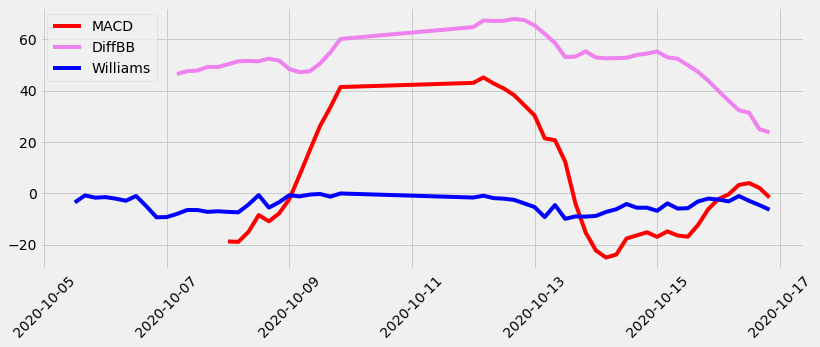

In [8]:
#Show MACD
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,Smacd1,label='MACD',color='red')
#plt.plot(df.index,Ssignal,label='Signal Line',color='blue')
plt.plot(df.index,DiffBB1,label='DiffBB',color='violet')
#plt.plot(df.index,df.lower,label='lower',color='violet')
plt.plot(df.index,Swilliams1,label='Williams',color='blue')
#plt.plot(df['close'],label='Close')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

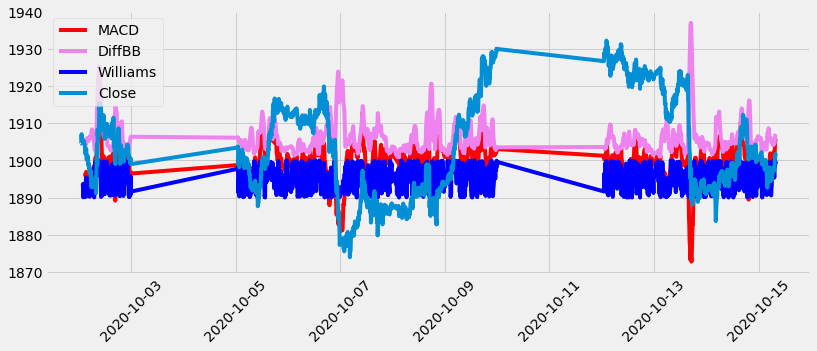

In [8]:
#Show MACD
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,Smacd,label='MACD',color='red')
#plt.plot(df.index,Ssignal,label='Signal Line',color='blue')
plt.plot(df.index,DiffBB,label='DiffBB',color='violet')
#plt.plot(df.index,df.lower,label='lower',color='violet')
plt.plot(df.index,Swilliams,label='Williams',color='blue')
plt.plot(df['close'],label='Close')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [9]:
#create a function to signal when to buy or sell
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    